# Install CPR

In [ ]:
!pip install cpr-rsi

# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import dataset

In [ ]:
from CPR import analysis

inputs = analysis.get_dataset()
# reduce size of dataset otherwise computations take too much time on collab
inputs = inputs.sample(50)

inputs.head()

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
492,1979.0,female,65.0,high school,34500.0,NaN,NaN,0.00000,NaN,13888.888889,NaN,0.000000,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,male,65.0,university,32000.0,NaN,30000.000000,NaN,21052.631579,12413.793103,0.0,NaN,0.012632,0.295567,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,1.000000,0.000000,0.010000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,60.0,0,0.0,0,0.0,0,0,0.0,0.0
1236,1962.0,female,65.0,high school,53000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.40,0.05,5500.0,13750.0,0.0,0.0,1984.0,male,85.0,university,73718.0,NaN,435824.742268,4117.647059,5000.000000,3000.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,NaN,NaN,NaN,NaN,NaN,NaN,0.305263,0.473684,0.221053,0.010789,0.003316,1000.0,NaN,NaN,NaN,10300.0,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,500.0,NaN,NaN,NaN,65.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
1557,1972.0,female,60.0,university,65000.0,NaN,NaN,140.62500,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,0.28,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,300000.0,NaN,300000.0,NaN,NaN,NaN,0.244898,0.387755,0.367347,0.012551,0.005510,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
427,1960.0,female,70.0,university,86000.0,NaN,40000.0,24000.00000,0.0,NaN,0.0325,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,qc,340000.0,NaN,340000.0,NaN,NaN,NaN,0.396947,0.007634,0.595420,0.014962,0.008931,NaN,7000.0,NaN,NaN,NaN,170000.0,NaN,NaN,NaN,340.0,NaN,NaN,NaN,1000.0,NaN,NaN,65.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
689,1986.0,male,65.0,university,40000.0,NaN,NaN,80645.16129,NaN,NaN,NaN,0.032258,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,550000.0,NaN,550000.0,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,444000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,65.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN


# Run model
Deterministic model and stochastic model with 25 simulations

In [ ]:
from CPR import main

res_deter = main.run_simulations(inputs, 1, non_stochastic=True)
res_deter.summarize()


total time: 3.4594550132751465

Deterministic Model


In [ ]:
res_stoch = main.run_simulations(inputs, 25, non_stochastic=False)
res_stoch.summarize()


total time: 73.25056529045105

Stochastic Model, 25 simulations


# Analyse results

## See output

In [ ]:
res_deter.output.head()

,hh_index,sim,s_wage_bef,s_pension_bef,wage_bef,pension_bef,cons_bef,s_unreg_balance_bef,s_rrsp_balance_bef,s_tfsa_balance_bef,s_other_reg_balance_bef,unreg_balance_bef,tfsa_balance_bef,s_wage_part,s_pension_part,wage_part,pension_part,s_unreg_balance_part,s_rrsp_balance_part,s_tfsa_balance_part,s_other_reg_balance_part,unreg_balance_part,tfsa_balance_part,s_annuity_rrsp_part,s_annuity_rpp_dc_part,s_annuity_non_rrsp_part,annuity_rrsp_part,annuity_rpp_dc_part,annuity_non_rrsp_part,s_wage_after,s_pension_after,wage_after,pension_after,s_annuity_rrsp_after,s_annuity_rpp_dc_after,s_annuity_non_rrsp_after,annuity_rrsp_after,annuity_rpp_dc_after,annuity_non_rrsp_after,cons_after,s_cpp_after,s_gis_after,s_oas_after,cpp_after,gis_after,oas_after,rpp_dc_bef,rpp_dc_part,rpp_db_benefits_after,first_residence_bef,first_residence_after,first_mortgage_balance_bef,rrsp_balance_bef,other_reg_balance_bef,first_mortgage_balance_after,s_rpp_dc_bef,s_rpp_dc_part,rrsp_balance_part,s_rpp_db_benefits_after,business_bef,first_residence_part,business_part,first_mortgage_balance_part,business_after,other_reg_balance_part,second_residence_bef,second_residence_after
0,492,0,28699.05609,NaN,35822.251435,NaN,43811.955646,55851.999076,29874.968995,0.000000,22878.090026,13405.920977,0.000000,0.00000,NaN,34292.26596,NaN,0.000000,0.000000,0.000000,0.000000,12858.107667,0.0,3349.62381,0.0,6869.529961,0.0,0.000000,0.0,0.0,NaN,0.0,NaN,3349.623810,0.0,6869.529961,0.000000,0.000000,678.247444,45475.455245,8266.081029,247.298451,7121.31,10877.941689,247.298451,7121.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1236,0,73718.00000,NaN,53000.000000,NaN,87519.982602,2912.000000,429840.015258,4061.103703,4931.340211,0.000000,0.000000,86025.53031,NaN,0.00000,NaN,3139.505758,499859.027502,4722.639297,5734.633432,0.000000,0.0,0.00000,0.0,0.000000,0.0,985.890288,0.0,0.0,NaN,0.0,NaN,61190.948785,0.0,4964.022322,0.000000,985.890288,0.000000,267839.135931,34073.496410,0.000000,0.00,14109.207827,0.000000,0.00,12977.5305,0.0,299332.577055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1557,0,NaN,NaN,56018.681126,NaN,40705.063964,NaN,NaN,NaN,NaN,0.000000,167.024470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,9.053011,24190.732757,NaN,NaN,NaN,9946.117225,1292.241079,7121.31,NaN,NaN,5581.922881,355030.659387,337383.329427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,427,0,NaN,NaN,86000.000000,NaN,42235.548770,NaN,NaN,NaN,NaN,0.000000,22663.272183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,6020.400925,0.000000,2243.183411,24455.513655,NaN,NaN,NaN,22632.668691,0.000000,7121.31,NaN,NaN,NaN,346938.720000,408086.985338,163156.632488,40567.120305,0.0,56697.115233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,689,0,NaN,NaN,43842.524694,NaN,14519.947150,NaN,NaN,NaN,NaN,0.000000,145845.868867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,9786.359956,33034.823670,NaN,NaN,NaN,15514.123540,1001.461318,7121.31,NaN,NaN,NaN,825302.321765,942529.992232,53737.428497,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merge with input and check preparedness

In [ ]:
res_deter.check_preparedness()
df = res_deter.df_merged

print(f'percentage people prepared in sample: {df.prepared.mean() * 100:.2f}%')

percentage people prepared in sample: 84.00%


## RRI distribution

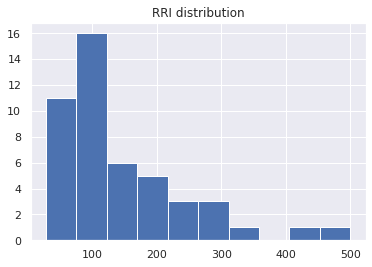

In [ ]:
sns.set()
ax = df.rri[df.rri < 500].hist()
ax.set_title('RRI distribution')
plt.show()

## Risk
### Preparation rate at aggregate level

In [ ]:
res_stoch.check_preparedness()
df = res_stoch.df_merged

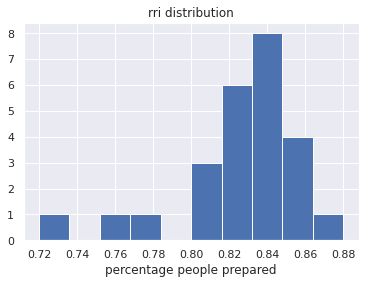

In [ ]:
ax = df.groupby('sim')['prepared'].mean().hist()
ax.grid()
ax.set_title('rri distribution')
ax.set_xlabel('percentage people prepared')
ax.grid()
plt.show()

## Experiments

### Selling first residence

In [ ]:
vars(res_deter.common)

In [ ]:
res_not_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                       sell_first_resid=False)
res_not_selling.summarize()
res_not_selling.check_preparedness()
df = res_not_selling.df_merged

print(f'\npercentage people prepared without selling house: {df.prepared.mean() * 100:.2f}%')

res_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                   sell_first_resid=True)
res_selling.summarize()
res_selling.check_preparedness()
df = res_selling.df_merged

print(f'\npercentage people prepared when selling house: {df.prepared.mean() * 100:.2f}%')


total time: 3.4691531658172607

Deterministic Model

Extra parameters:
sell_first_resid: False

percentage people prepared without selling house: 84.00%

total time: 3.54872465133667

Deterministic Model

Extra parameters:
sell_first_resid: True

percentage people prepared when selling house: 82.00%


In [ ]:
vars(res_deter.prices)

In [ ]:
mu_equity_bm = res_deter.prices.mu_equity
mu_bills_bm = res_deter.prices.mu_bills
mu_bonds_bm = res_deter.prices.mu_bonds

factors = np.linspace(0, 2, 10)

l_prepared = []
for factor in factors:
    res = main.run_simulations(inputs, 1, non_stochastic=True,
                               mu_equity=factor * mu_equity_bm,
                               mu_bills=factor * mu_bills_bm,
                               mu_bonds=factor * mu_bonds_bm)
    res.check_preparedness()
    l_prepared.append(res.df_merged.prepared.mean())    


total time: 3.460703134536743

total time: 3.5660581588745117

total time: 3.4482765197753906

total time: 3.4501049518585205

total time: 3.4532580375671387

total time: 3.6718432903289795

total time: 3.541018009185791

total time: 3.4563918113708496

total time: 3.454519033432007

total time: 3.5616414546966553


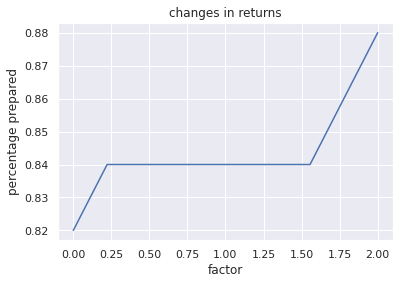

In [ ]:
plt.plot(factors, l_prepared)
plt.title('changes in returns')
plt.xlabel('factor')
plt.ylabel('percentage prepared')
plt.show()

# Using CPR with other inputs

More info on the variables here: http://ire.hec.ca/en/wp-content/uploads/sites/3/2020/06/cpr-report-2020-final.pdf

In [ ]:
inputs.head()

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
492,1979.0,female,65.0,high school,34500.0,NaN,NaN,0.00000,NaN,13888.888889,NaN,0.000000,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,male,65.0,university,32000.0,NaN,30000.000000,NaN,21052.631579,12413.793103,0.0,NaN,0.012632,0.295567,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,1.000000,0.000000,0.010000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,60.0,0,0.0,0,0.0,0,0,0.0,0.0
1236,1962.0,female,65.0,high school,53000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.40,0.05,5500.0,13750.0,0.0,0.0,1984.0,male,85.0,university,73718.0,NaN,435824.742268,4117.647059,5000.000000,3000.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,NaN,NaN,NaN,NaN,NaN,NaN,0.305263,0.473684,0.221053,0.010789,0.003316,1000.0,NaN,NaN,NaN,10300.0,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,500.0,NaN,NaN,NaN,65.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
1557,1972.0,female,60.0,university,65000.0,NaN,NaN,140.62500,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,0.28,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,300000.0,NaN,300000.0,NaN,NaN,NaN,0.244898,0.387755,0.367347,0.012551,0.005510,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
427,1960.0,female,70.0,university,86000.0,NaN,40000.0,24000.00000,0.0,NaN,0.0325,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,qc,340000.0,NaN,340000.0,NaN,NaN,NaN,0.396947,0.007634,0.595420,0.014962,0.008931,NaN,7000.0,NaN,NaN,NaN,170000.0,NaN,NaN,NaN,340.0,NaN,NaN,NaN,1000.0,NaN,NaN,65.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
689,1986.0,male,65.0,university,40000.0,NaN,NaN,80645.16129,NaN,NaN,NaN,0.032258,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,550000.0,NaN,550000.0,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,444000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,65.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN


In [ ]:
# saving copy of dataframe
inputs.iloc[0, :].to_frame().T.to_csv('my_inputs.csv', index=False)

In [ ]:
my_inputs = pd.read_csv('my_inputs.csv')

In [ ]:
my_res = main.run_simulations(my_inputs, 100, non_stochastic=False)
my_res.check_preparedness()
df = my_res.df_merged

df.prepared.value_counts(normalize=True)


total time: 10.884327173233032


True    1.0
Name: prepared, dtype: float64

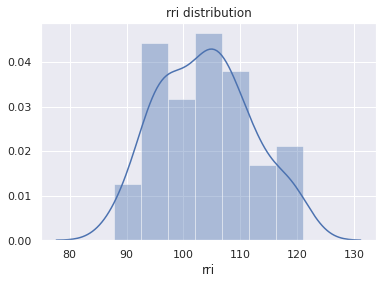

In [ ]:
ax = sns.distplot(df.loc[df.rri<500, 'rri'])
ax.grid()
ax.set_title('rri distribution')
ax.grid()
plt.show()